# 1. Setup

> ## 1.1 Import Libraries

First, we import python modules required for data wrangling, exploratory data analysis, model building and data visualization.

In [1]:
#data manipulation and visualization libraries
import os
import time
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes._axes as axes
from matplotlib.figure import Figure
import seaborn as sns
import plotly
import plotly.express as px
from warnings import filterwarnings

#data prepocessing and classic ML libraries

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder, RobustScaler, normalize 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold, RepeatedKFold, StratifiedKFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, r2_score

from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, LogisticRegression, Ridge
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier 
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier  

#for imbalanced classification
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier
from imblearn.over_sampling import RandomOverSampler

#neural network libraries
import tensorflow as tf
from tensorflow.math import reduce_prod
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.metrics import AUC
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

np.random.seed(123)
filterwarnings('ignore')
pd.set_option('display.float_format', lambda num:'%1.3f'%num)
pd.set_option('display.max_columns', 99)
sns.set()

In [2]:
#!pip install xgboost
#!pip uninstall pycocotools
#!pip install pycocotools-windows
np.version.version
!pip install numpy==1.18.5

> ## 1.2. Load Datasets

To get started, the provided datasets are loaded as pandas dataframes.

In [3]:
df = pd.read_csv("train_std.csv")
df.head(100)

,id,breath_id,time_step,u_in,pressure,R_20,R_5,R_50,C_10,C_20,C_50,u_out_0,u_out_1,R_C_20_10,R_C_20_20,R_C_20_50,R_C_50_10,R_C_50_20,R_C_50_50,R_C_5_10,R_C_5_20,R_C_5_50
0,1,1,0.000,0.001,5.837,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
1,2,1,0.034,0.184,5.908,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
2,3,1,0.068,0.225,7.876,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
3,4,1,0.102,0.228,11.743,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
4,5,1,0.136,0.254,12.235,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2,0.510,0.080,15.047,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
96,97,2,0.544,0.079,15.117,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
97,98,2,0.578,0.082,14.696,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
98,99,2,0.612,0.073,15.820,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0


In [4]:
#print(df.columns)

In [5]:
debug = 1
if debug:
    df = df[:80*100]
print(df.shape)
X, Y = df.iloc[:, ~df.columns.isin(['pressure', 'id','Unnamed: 0'])], df.iloc[:, df.columns == 'pressure']
Y = Y.to_numpy()#.reshape(-1, 80)
X = X.to_numpy()#.reshape(-1, 80, X.shape[-1])
print(X.shape, Y.shape, type(X))

(8000, 22)
(8000, 20) (8000, 1) <class 'numpy.ndarray'>


# 2. Classic Machine Learning Model

> ## 2.1 Model Building

In [6]:
# split the dataset into train and validation sets. here we follow a 70-30% split
validation_size = 0.3
seed = 123

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=validation_size, random_state=seed)
print(X_train.shape, Y_train.shape)

(5600, 20) (5600, 1)


In [7]:
# Evaluate an array on algorithms to decide on baseline performance
num_folds = 10 
scoring = 'r2'
#scoring = 'roc_auc'

In [8]:
# select a series of candidate classifier algorithms with DEFAULT parameters. The target variable is highly
# imbalanced so we will assign adaptive weights to the targets via the class_weight parameter

models = [] 
models.append(('LR' , LinearRegression())) 
models.append(('Ridge' , Ridge())) 
models.append(('Lasso' , Lasso()))
#models.append(('Poly' , GradientBoostingClassifier()))

> ## 2.2 Model Training and Cross-Validation

In [9]:
results = [] 
names = [] 

for name, model in models: 
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.395913 (0.025784)
Ridge: 0.395923 (0.025753)
Lasso: 0.312376 (0.018124)


> ## 2.3 Model Comparison

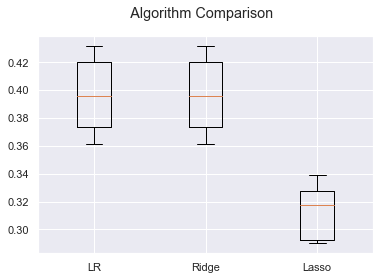

In [10]:
# Compare Algorithms 
sns.set(font_scale=1)
fig = plt.figure() 
fig.suptitle(' Algorithm Comparison' ) 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names)
fig.savefig('ModelComparison.pdf',format='pdf')

> ## 2.4 Hyperparameter Tuning

In [11]:
#GridSearch for linear regression
folds = KFold(n_splits = 10, shuffle = True, random_state = 123)

hyper_params = [{'n_features_to_select': list(range(1, 20))}]

lm = LinearRegression()
lm.fit(X_train, Y_train)

#RFE feature selection model
rfe = RFE(lm)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, Y_train) 

Fitting 10 folds for each of 19 candidates, totalling 190 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19]}],
             return_train_score=True, scoring='r2', verbose=1)

In [12]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.021,0.007,0.000,0.000,1,{'n_features_to_select': 1},0.350,0.405,0.359,0.364,0.325,0.006,0.375,0.398,-0.005,0.424,0.300,0.152,18,0.387,0.381,0.386,0.385,0.389,0.001,0.384,0.380,0.001,0.379,0.307,0.153
1,0.018,0.005,0.000,0.000,2,{'n_features_to_select': 2},0.350,0.405,0.359,0.364,0.325,0.011,0.375,0.398,-0.010,0.424,0.300,0.152,19,0.387,0.381,0.386,0.385,0.389,0.002,0.384,0.380,0.004,0.379,0.308,0.152
2,0.020,0.007,0.000,0.000,3,{'n_features_to_select': 3},0.354,0.409,0.358,0.362,0.331,0.019,0.372,0.398,-0.004,0.423,0.302,0.150,17,0.388,0.382,0.388,0.387,0.390,0.007,0.386,0.382,0.009,0.381,0.310,0.151
3,0.016,0.005,0.000,0.000,4,{'n_features_to_select': 4},0.358,0.418,0.371,0.369,0.342,0.020,0.368,0.396,-0.005,0.422,0.306,0.151,16,0.393,0.387,0.392,0.392,0.395,0.009,0.392,0.388,0.011,0.386,0.314,0.152
4,0.019,0.006,0.002,0.005,5,{'n_features_to_select': 5},0.358,0.421,0.375,0.372,0.350,0.020,0.371,0.401,0.002,0.429,0.310,0.151,14,0.394,0.391,0.396,0.396,0.397,0.009,0.395,0.392,0.012,0.389,0.317,0.153
5,0.015,0.002,0.000,0.000,6,{'n_features_to_select': 6},0.363,0.420,0.373,0.364,0.352,0.020,0.374,0.402,0.002,0.427,0.310,0.151,15,0.399,0.392,0.398,0.401,0.399,0.009,0.396,0.395,0.012,0.391,0.319,0.154
6,0.015,0.003,0.000,0.000,7,{'n_features_to_select': 7},0.369,0.414,0.374,0.366,0.357,0.020,0.380,0.402,0.006,0.419,0.311,0.150,13,0.401,0.395,0.400,0.402,0.401,0.009,0.399,0.396,0.011,0.395,0.321,0.155
7,0.012,0.006,0.005,0.007,8,{'n_features_to_select': 8},0.372,0.417,0.371,0.364,0.362,0.025,0.386,0.402,0.001,0.421,0.312,0.151,12,0.402,0.396,0.401,0.403,0.403,0.013,0.400,0.397,0.015,0.396,0.323,0.154
8,0.014,0.005,0.000,0.000,9,{'n_features_to_select': 9},0.371,0.419,0.372,0.363,0.361,0.025,0.386,0.402,0.001,0.420,0.312,0.151,11,0.402,0.397,0.401,0.403,0.403,0.013,0.400,0.397,0.015,0.397,0.323,0.155
9,0.012,0.006,0.000,0.000,10,{'n_features_to_select': 10},0.371,0.418,0.374,0.363,0.361,0.425,0.386,0.402,0.000,0.420,0.352,0.119,10,0.402,0.397,0.402,0.403,0.403,0.392,0.400,0.398,0.015,0.397,0.361,0.115


plot results

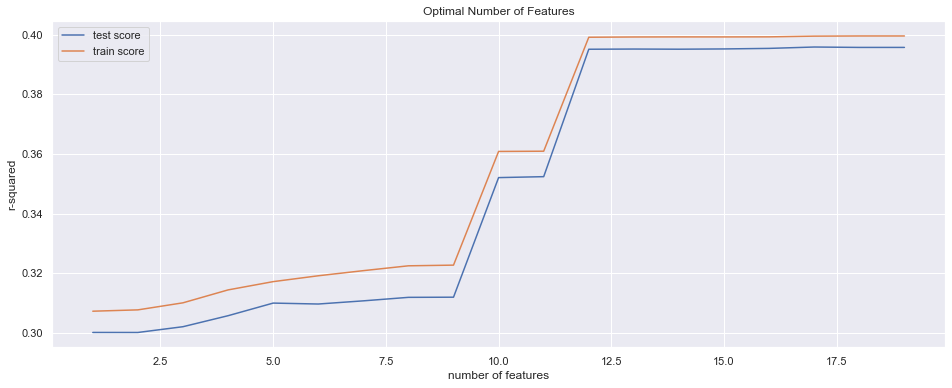

In [13]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

> ## 2.5 Make prediction

In [14]:
# final model
n_features_optimal = 12

lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, Y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = r2_score(Y_test, y_pred)
print(r2)

0.41945973849316864


# 3. Deep Learning Model

In [15]:
if debug:
    df_copy = df[:80*2000]
#df_copy.info()
X, Y = df_copy.iloc[:, ~df.columns.isin(['pressure', 'id','Unnamed: 0'])], df_copy.iloc[:, df.columns == 'pressure']
Y = Y.to_numpy().reshape(-1, 80)

RS = RobustScaler()
X = RS.fit_transform(X)

X = X.reshape(-1, 80, X.shape[-1])
print(X.shape, Y.shape, type(X))

(100, 80, 20) (100, 80) <class 'numpy.ndarray'>


In [18]:
EPOCH = 300
BATCH_SIZE = 1024
NUM_FOLDS = 2

kf = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=103)
test_preds = []
for fold, (train_idx, test_idx) in enumerate(kf.split(X, Y)):
    print('-'*15, '>', f'Fold {fold+1}', '<', '-'*15)
    X_train, X_valid = X[train_idx], X[test_idx]
    y_train, y_valid = Y[train_idx], Y[test_idx]
    model = keras.models.Sequential([
        keras.layers.Input(shape=X.shape[-2:]),
        keras.layers.Bidirectional(keras.layers.LSTM(1024,return_sequences=True)),
        keras.layers.Bidirectional(keras.layers.LSTM(512, return_sequences=True)),
        keras.layers.Bidirectional(keras.layers.LSTM(256, return_sequences=True)),
        keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True)),
#             keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True)),
        keras.layers.Dense(128, activation='selu'),
#             keras.layers.Dropout(0.1),
        keras.layers.Dense(1),
    ])
    model.compile(optimizer="adam", loss="mae")

#         scheduler = ExponentialDecay(1e-3, 40*((len(train)*0.8)/BATCH_SIZE), 1e-5)
#         lr = LearningRateScheduler(scheduler, verbose=1)
    lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=10, verbose=1)
#         lr = WarmupExponentialDecay(lr_base=1e-3, decay=1e-5, warmup_epochs=30)
    es = EarlyStopping(monitor="val_loss", patience=60, verbose=1, mode="min", restore_best_weights=True)

    checkpoint_filepath = f"folds{fold}.hdf5"
    sv = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True,
        save_weights_only=False, mode='auto', save_freq='epoch',
        options=None
    )

    model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=EPOCH, batch_size=BATCH_SIZE, callbacks=[lr, es, sv])
    #model.save(f'Fold{fold+1} RNN Weights')
    test_preds.append(model.predict(test).squeeze().reshape(-1, 1).squeeze())

--------------- > Fold 1 < ---------------
Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 11.2598
Epoch 00001: val_loss improved from inf to 8.23467, saving model to folds0.hdf5
1/1 [==============================] - 6s 6s/step - loss: 11.2598 - val_loss: 8.2347
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 7.9078
Epoch 00002: val_loss improved from 8.23467 to 5.83113, saving model to folds0.hdf5
1/1 [==============================] - 3s 3s/step - loss: 7.9078 - val_loss: 5.8311
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 5.4022
Epoch 00003: val_loss improved from 5.83113 to 5.42050, saving model to folds0.hdf5
1/1 [==============================] - 3s 3s/step - loss: 5.4022 - val_loss: 5.4205
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 4.9882
Epoch 00004: val_loss did not improve from 5.42050
1/1 [==============================] - 3s 3s/step - loss: 4.9882 - val_loss: 5.6813
Epoch 5/300
1/1 [=======

Epoch 38/300
1/1 [==============================] - ETA: 0s - loss: 4.2483
Epoch 00038: val_loss improved from 4.43634 to 4.35438, saving model to folds0.hdf5
1/1 [==============================] - 3s 3s/step - loss: 4.2483 - val_loss: 4.3544
Epoch 39/300
1/1 [==============================] - ETA: 0s - loss: 3.9870
Epoch 00039: val_loss improved from 4.35438 to 4.03564, saving model to folds0.hdf5
1/1 [==============================] - 3s 3s/step - loss: 3.9870 - val_loss: 4.0356
Epoch 40/300
1/1 [==============================] - ETA: 0s - loss: 3.6874
Epoch 00040: val_loss did not improve from 4.03564
1/1 [==============================] - 3s 3s/step - loss: 3.6874 - val_loss: 5.0588
Epoch 41/300
1/1 [==============================] - ETA: 0s - loss: 5.0434
Epoch 00041: val_loss improved from 4.03564 to 3.93556, saving model to folds0.hdf5
1/1 [==============================] - 3s 3s/step - loss: 5.0434 - val_loss: 3.9356
Epoch 42/300
1/1 [==============================] - ETA: 0s -

KeyboardInterrupt: 